In [58]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss

%matplotlib inline 
import matplotlib.pyplot as plt

In [5]:
import kagglehub
path = kagglehub.dataset_download("dinaouahbi/churndatacsv")

print("Path to dataset files:", path)

100%|██████████| 7.99k/7.99k [00:00<00:00, 1.68MB/s]

Extracting files...
Path to dataset files: C:\Users\Behbab\.cache\kagglehub\datasets\dinaouahbi\churndatacsv\versions\1


In [13]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [17]:
df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
y = np.asarray(df.loc[:, 'churn'].astype('int'))
X = np.asarray(df.drop("churn", axis=1))

In [20]:
scale = StandardScaler()
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [26]:
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [50]:
coefficients = pd.Series(LR.coef_[0], index=df.columns[:-1]).sort_values()
coefficients

tenure    -0.845698
employ    -0.232906
age       -0.175660
address   -0.124221
income    -0.010150
ed         0.060124
equip      0.751990
dtype: float64

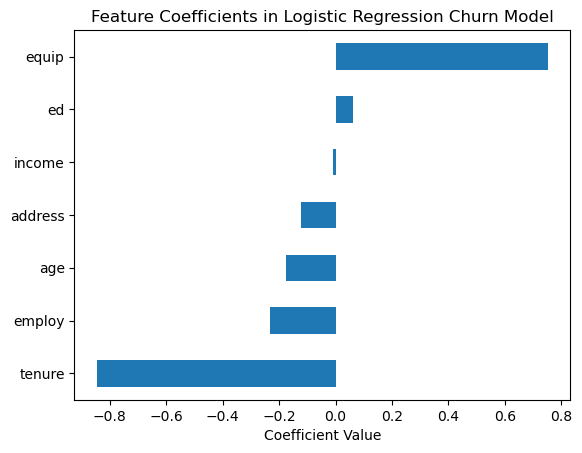

In [52]:
coefficients.plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [60]:
log_loss(y_test, yhat_prob)

0.6257718410257235

In [63]:
X1 = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard']])
X1 = scale.fit_transform(X1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=4)
LR.fit(X1_train,y_train)
yhat1 = LR.predict(X1_test)
yhat1_prob = LR.predict_proba(X1_test)
log_loss(y_test, yhat1_prob)

0.6039104035600186

In [68]:
X2 = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']])
X2 = scale.fit_transform(X2)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=4)
LR.fit(X2_train,y_train)
yhat2 = LR.predict(X2_test)
yhat2_prob = LR.predict_proba(X2_test)
log_loss(y_test, yhat2_prob)

0.7760557225417115

In [72]:
X3 = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless']])
X3 = scale.fit_transform(X3)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=4)
LR.fit(X3_train,y_train)
yhat3 = LR.predict(X3_test)
yhat3_prob = LR.predict_proba(X3_test)
log_loss(y_test, yhat3_prob)

0.7227054293985519

In [76]:
X4 = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ']])
X4 = scale.fit_transform(X4)
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=4)
LR.fit(X4_train,y_train)
yhat4 = LR.predict(X4_test)
yhat4_prob = LR.predict_proba(X4_test)
log_loss(y_test, yhat4_prob)

0.530242735024537

In [79]:
X5 = np.asarray(churn_df[['tenure', 'age', 'address', 'ed', 'equip']])
X5 = scale.fit_transform(X5)
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=4)
LR.fit(X5_train,y_train)
yhat5 = LR.predict(X5_test)
yhat5_prob = LR.predict_proba(X5_test)
log_loss(y_test, yhat5_prob)

0.6529317169884828